In [37]:
from ISLP import load_data
from ISLP.models import summarize, ModelSpec as MS

import statsmodels.api as sm

import numpy as np

import matplotlib.pyplot as plt

In [2]:
Default = load_data('Default')
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [12]:
columns = ['income', 'balance']
design = MS(columns)
X = design.fit_transform(Default)
y = Default.default == 'Yes'

model = sm.GLM(y, X, family = sm.families.Binomial()) # Binomial for Logistic Regression

results = model.fit()
print(summarize(results))
print(results.summary())

                coef   std err       z  P>|z|
intercept -11.540500  0.435000 -26.544    0.0
income      0.000021  0.000005   4.174    0.0
balance     0.005600  0.000000  24.835    0.0
                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Sat, 13 Jan 2024   Deviance:                       1579.0
Time:                        14:37:12   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
                 coef    s

In [20]:
res = summarize(results)
res['std err']['income'], res['std err']['balance']

(4.99e-06, 0.0)

In [46]:
def compute_coefs(D, idx):
    columns = ['income', 'balance']
    design = MS(columns)
    X = design.fit_transform(D.loc[idx])
    y = D.loc[idx].default == 'Yes'

    model = sm.GLM(y, X, family = sm.families.Binomial()) # Binomial for Logistic Regression

    results = model.fit()
    res = summarize(results)
    return res['coef']['income'], res['coef']['balance']

def boot_fn(data, n=None, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    n = n or data.shape[0]

    income_sum_ = 0
    income_sum_squared_ = 0
    balance_sum_ = 0
    balance_sum_squared_ = 0
    for _ in range(B):
        idx = rng.choice(data.index, n, replace=True)
        coefs = compute_coefs(data, idx)
        
        income_sum_ += coefs[0]
        income_sum_squared_ += coefs[0]**2
        balance_sum_ += coefs[1]
        balance_sum_squared_ += coefs[1]**2

    std_income = np.sqrt(income_sum_squared_ / B - (income_sum_ / B)**2)
    std_balance = np.sqrt(balance_sum_squared_ / B - (balance_sum_ / B)**2)

    return std_income, std_balance

def boot_fn_plot_hist(data, n=None, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    n = n or data.shape[0]

    income = []
    balance = []
    for _ in range(B):
        idx = rng.choice(data.index, n, replace=True)
        coefs = compute_coefs(data, idx)
        
        income.append(coefs[0])
        balance.append(coefs[1])

    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(10,6))

    axs[0].hist(income, bins=25)
    axs[1].hist(balance, bins=25)

In [36]:
boot_fn(Default, B=10)

(5.5560490458598254e-06, 0.00023748684174074766)

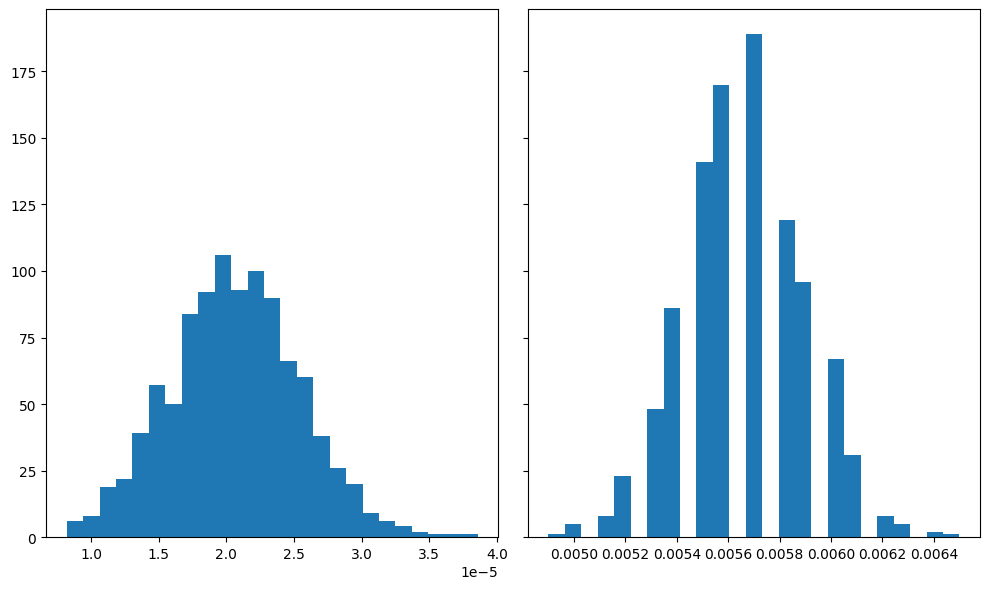

In [48]:
boot_fn_plot_hist(Default, B=1000)